In [29]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

df = pd.read_csv("KaDo.csv")
df

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281
...,...,...,...,...,...,...,...,...
7245517,35448190,9,2.50,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,SVC CR MAINS ET ONGLES T75ml,997385337
7245518,35448190,9,3.00,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 LAVANDIN DE PROVENCE 200ML,997385337
7245519,36105678,12,7.90,MAQUILLAGE,MAQ_YEUX Crayons,MAQ_YEUX_CLASSIQUE,CRAYON REGARD PRUNE CN3 1.3G,997385337
7245520,36105678,12,11.45,MAQUILLAGE,MAQ_YEUX Mascara Elixir,MAQ_YEUX_MASCA_HG,MASCARA SOIN NOIR01 2014 CN3 9ML,997385337


Check number of ticket and client unique

In [30]:
ticket = df.loc[:,'TICKET_ID']
ticketU = ticket.unique()
print(len(ticket.unique()))
client = df.loc[:,'CLI_ID']
print(len(client.unique()))

2734841
853514


Check aricle/nombre acheté par client 

In [31]:
nbAr = df.loc[:,['LIBELLE', 'CLI_ID']]
nbAr.groupby("LIBELLE").agg('CLI_ID').value_counts()

LIBELLE                            CLI_ID   
2010 KIT MAQ PDR                   921576316    2
                                   956762920    1
                                   956961467    1
                                   959464732    1
                                   959496677    1
                                               ..
x99SS GELEE FRUITS VANIL PN2 10ML  996996217    1
                                   997007618    1
                                   997023102    1
                                   997023649    1
                                   997037665    1
Name: CLI_ID, Length: 5911149, dtype: int64

Répartition par mois

In [32]:
month = df.loc[:,["MOIS_VENTE"]]
# disp = month.groupby("CLI_ID")["MOIS_VENTE"].value_counts()
# disp
repMonth = month.groupby("MOIS_VENTE").value_counts()

graph

<AxesSubplot: xlabel='month'>

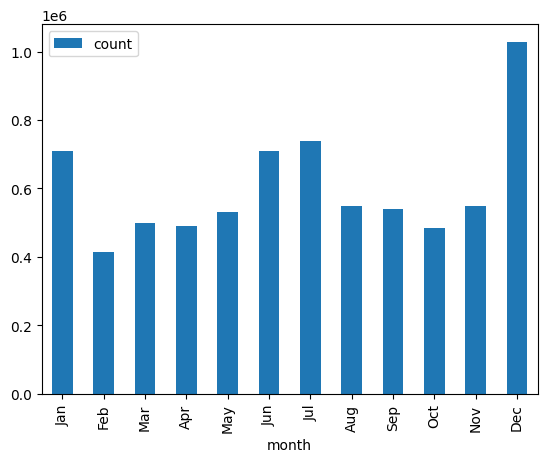

In [33]:
nameMonth = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# plt.axes(nameMonth)
# plt.xlabel(nameMonth)
# plt.line(repMonth)
# repMonth.plot.bar()
graphM = pd.DataFrame({'month':nameMonth, 'count':repMonth})
graphM.plot.bar(x='month', y='count')


same for Univers, famille, maille

In [34]:
univers = df.loc[:, "UNIVERS"]
universU = univers.unique()
universC = univers.value_counts()
universC

HYG_DOUCHE JARDINMONDE      762858
HYG_DOUCHE PLAISIRNATURE    376849
MAQ_ONG Vernis LUM          271075
VIS_SOIN LEVRES             238731
CORPS_SOIN DES MAINS        231810
                             ...  
HYG_DEO AUTRES                   8
VIS_DEMAQ Autres                 3
VIS_LOTIONS BIO                  1
MAQ_YEUX Autres                  1
DIETETIQUE                       1
Name: UNIVERS, Length: 105, dtype: int64

<AxesSubplot: >

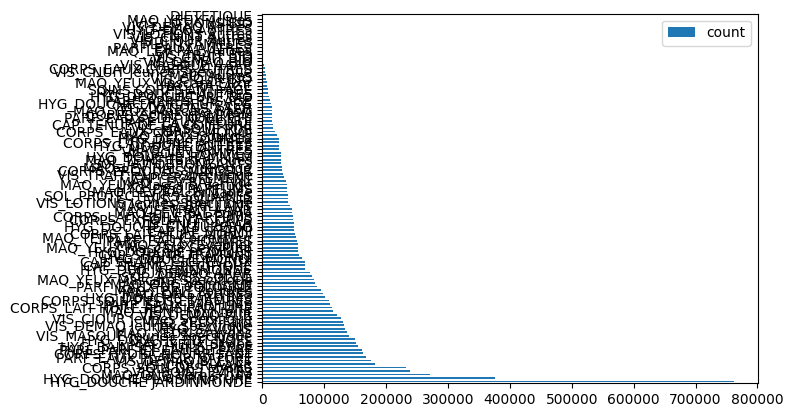

In [35]:
repU = pd.DataFrame({'univers':universU, 'count':universC})
# repU.plot.bar()
repU.plot.barh()

In [36]:
famille = df.loc[:,'FAMILLE']
familleU = famille.unique()
familleC = famille.value_counts()
familleC

HYGIENE            2095077
MAQUILLAGE         1694751
SOINS DU VISAGE    1494034
SOINS DU CORPS      878923
PARFUMAGE           628087
CAPILLAIRES         301365
SOLAIRES            153254
MULTI FAMILLES          30
SANTE NATURELLE          1
Name: FAMILLE, dtype: int64

<AxesSubplot: >

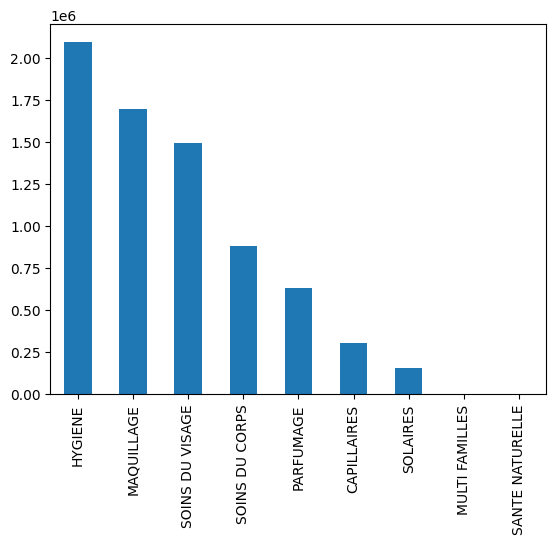

In [37]:
familleC.plot.bar()

In [38]:
maille = df.loc[:,'MAILLE']
mailleU = maille.unique()
mailleC = maille.value_counts()
mailleC

HYG_JDM                        832615
VIS_JEUNE_ET_LEVRE             719808
HYG_PLAISIRNAT_BAIN_SAVON      666333
CORPS_HYDRA_NOURRI_ET_SOINS    513178
MAQ_ONGLES                     455670
PARF_PARFUM                    357662
MAQ_YEUX_CLASSIQUE             328863
MAQ_YEUX_MASCA_EYEL_FARD       328461
MAQ_TEINT                      294300
VIS_AAAR_HORS_DEMAQLOTION      285627
HYG_MONOI_ET_EDIT_SPEC         241394
PARF_EDT                       201601
CAPILLAIRE_SHAMPOING           197236
CORPS_HYDR_LAIT_HUILE          193406
VIS_PUR                        179657
VIS_AUTRES                     175988
SOLAIRE                        153254
HYG_PARFUMEE                   142221
MAQ_LEV_RAL_HMG                139140
CAPILLAIRE_AUTRE               104129
CORPS_SPA_ET_MINCEUR            98760
MAQ_LEV_BASPRIX                 93880
HYG_HOMME                       93210
VIS_AAAR_DEMAQLOTION            93182
CORPS_MONOI                     73579
PARF_HOMME                      68824
HYG_CULTUREB

<AxesSubplot: >

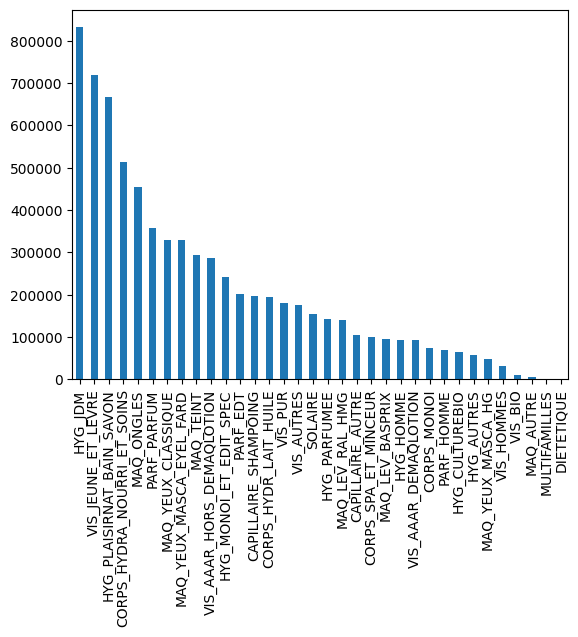

In [39]:
mailleC.plot.bar()

<AxesSubplot: >

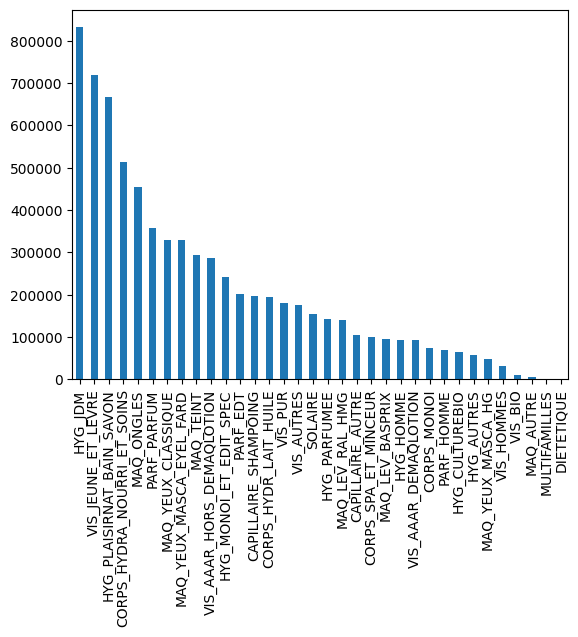

In [40]:
mailleC.plot.bar()

<AxesSubplot: >

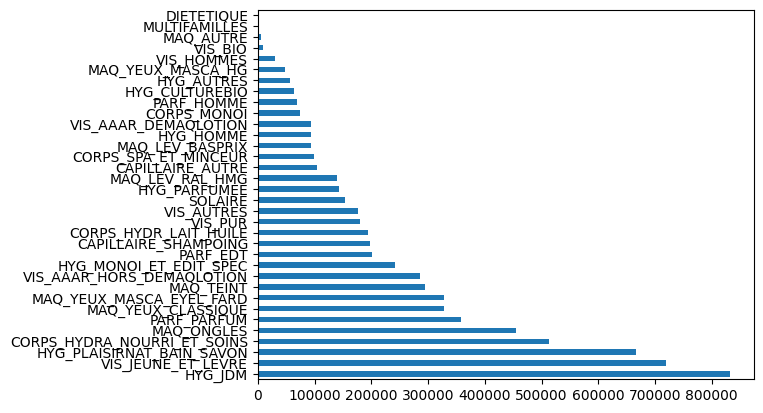

In [41]:
mailleC.plot.barh()

<AxesSubplot: >

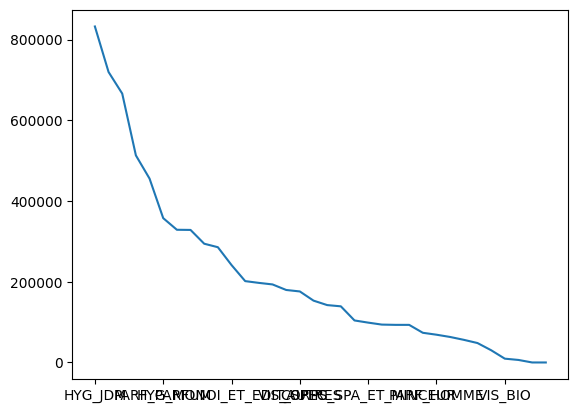

In [42]:
mailleC.plot.line()

represention for mean,max,min price

<AxesSubplot: xlabel='CLI_ID'>

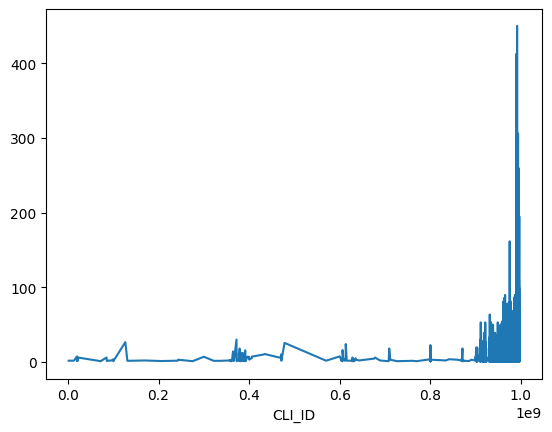

In [43]:
price = df.loc[:,['PRIX_NET', 'CLI_ID']]
calc = price.groupby('CLI_ID')['PRIX_NET'].agg([max, min, 'mean'])
# calc.plot()
price.groupby('CLI_ID')['PRIX_NET'].agg(min).plot()

try something

<AxesSubplot: ylabel='MOIS_VENTE,CLI_ID'>

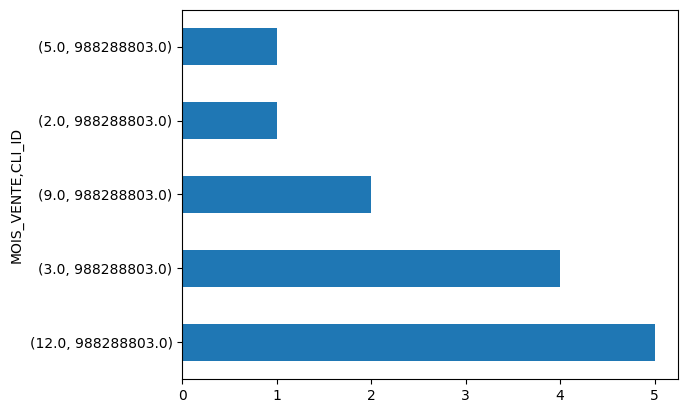

In [44]:
import random as rd
cliId = rd.randrange(0, len(client))

monthPur = df.loc[:,[ "MOIS_VENTE", "CLI_ID"]]
monthNum = [1,2,3,4,5,6,7,8,9,10,11,12]


monthPur.where(monthPur['CLI_ID'] == client[cliId]).value_counts().plot.barh()


mean price by Famille

0.01
1575.0


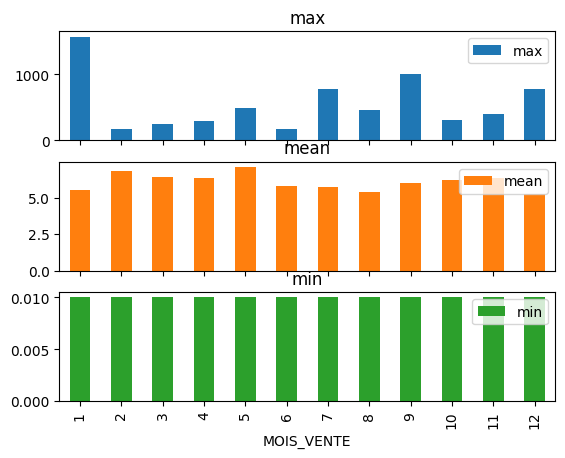

In [45]:
priceFamille = df.loc[:, ['MOIS_VENTE', 'PRIX_NET']]

priceFamille.groupby('MOIS_VENTE')['PRIX_NET'].agg([max, 'mean', min]).plot.bar(subplots=True)
print(df['PRIX_NET'].min())
print(df['PRIX_NET'].max())

array([<AxesSubplot: title={'center': 'max'}, xlabel='FAMILLE'>,
       <AxesSubplot: title={'center': 'mean'}, xlabel='FAMILLE'>,
       <AxesSubplot: title={'center': 'min'}, xlabel='FAMILLE'>],
      dtype=object)

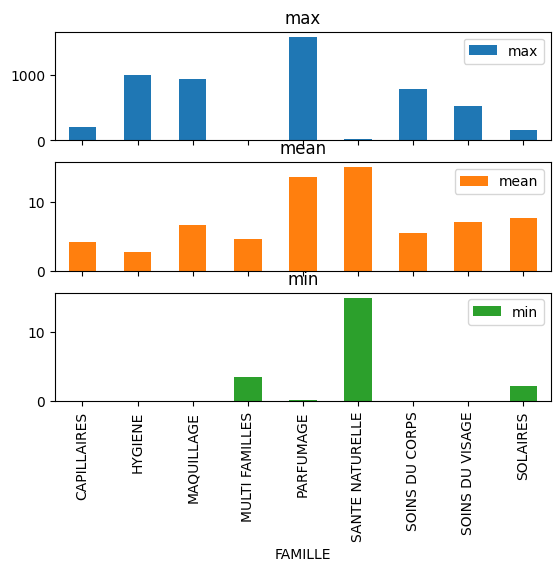

In [46]:
priceFamille = df.loc[:, ['FAMILLE', 'PRIX_NET']]

priceFamille.groupby('FAMILLE')['PRIX_NET'].agg([max, 'mean', min]).plot.bar(subplots=True)

array([<AxesSubplot: title={'center': 'max'}, xlabel='UNIVERS'>,
       <AxesSubplot: title={'center': 'mean'}, xlabel='UNIVERS'>,
       <AxesSubplot: title={'center': 'min'}, xlabel='UNIVERS'>],
      dtype=object)

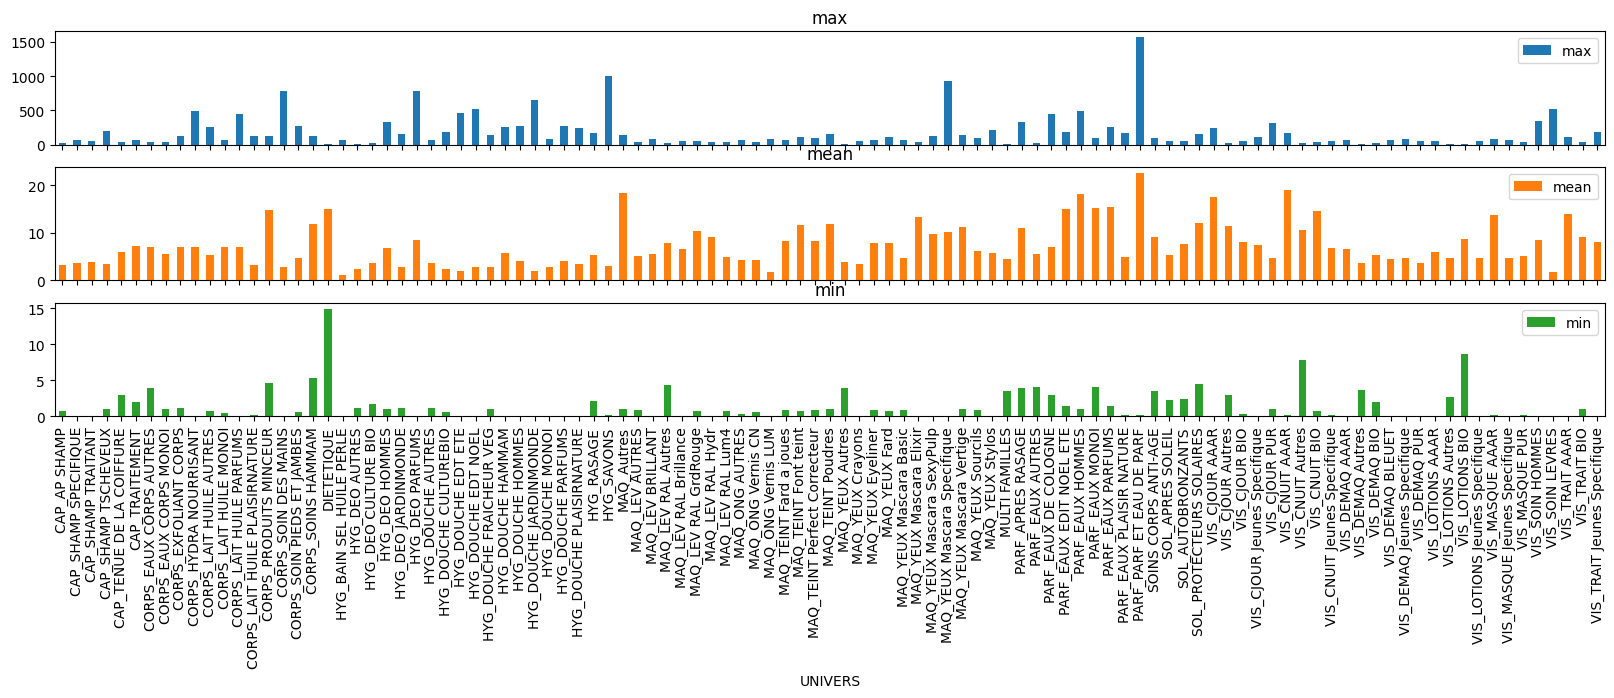

In [192]:
priceCategorie = df.loc[:, ['FAMILLE', "MAILLE", "UNIVERS", "PRIX_NET"]]
priceCategorie.groupby('UNIVERS')['PRIX_NET'].agg([max, 'mean', min]).plot.bar(subplots=True, figsize=(20,5))

array([<AxesSubplot: title={'center': 'max'}, xlabel='FAMILLE'>,
       <AxesSubplot: title={'center': 'mean'}, xlabel='FAMILLE'>,
       <AxesSubplot: title={'center': 'min'}, xlabel='FAMILLE'>],
      dtype=object)

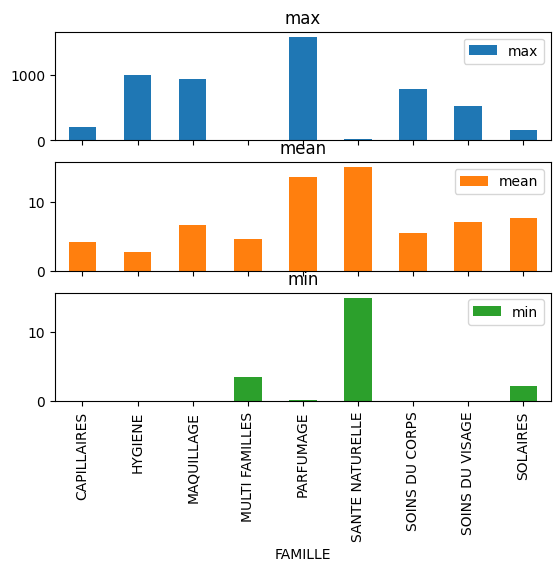

In [48]:
priceCategorie.groupby('FAMILLE')['PRIX_NET'].agg([max,'mean',min]).plot.bar(subplots=True)

array([<AxesSubplot: title={'center': 'max'}, xlabel='MAILLE'>,
       <AxesSubplot: title={'center': 'mean'}, xlabel='MAILLE'>,
       <AxesSubplot: title={'center': 'min'}, xlabel='MAILLE'>],
      dtype=object)

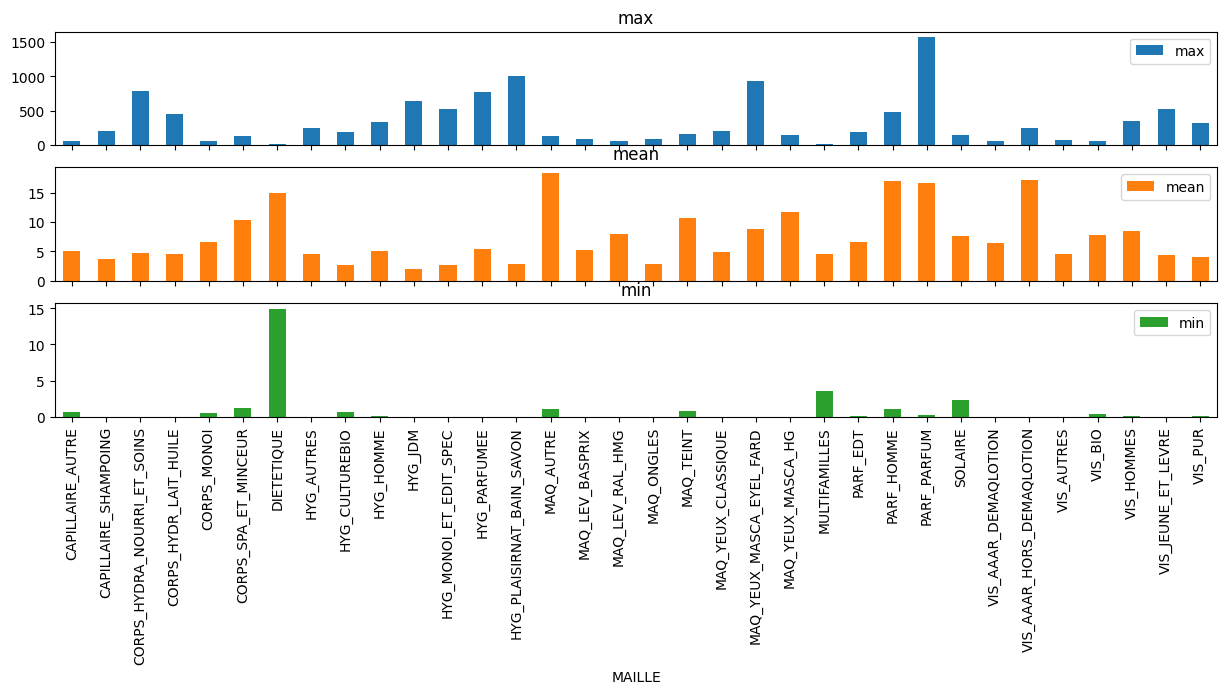

In [193]:
priceCategorie.groupby('MAILLE')['PRIX_NET'].agg([max,'mean',min]).plot.bar(subplots=True, figsize=(15,5))

number of item per Famille/Univers/Maille

In [58]:
items = df.loc[:, ['FAMILLE', 'UNIVERS', 'MAILLE', 'LIBELLE']]

itemByUnivers = items.agg('UNIVERS').value_counts()
itemByFamille = items.agg('FAMILLE').value_counts()
itemByMaille = items.agg('MAILLE').value_counts()


In [125]:
itemByUnivers

HYG_DOUCHE JARDINMONDE      762858
HYG_DOUCHE PLAISIRNATURE    376849
MAQ_ONG Vernis LUM          271075
VIS_SOIN LEVRES             238731
CORPS_SOIN DES MAINS        231810
                             ...  
HYG_DEO AUTRES                   8
VIS_DEMAQ Autres                 3
VIS_LOTIONS BIO                  1
MAQ_YEUX Autres                  1
DIETETIQUE                       1
Name: UNIVERS, Length: 105, dtype: int64

<AxesSubplot: >

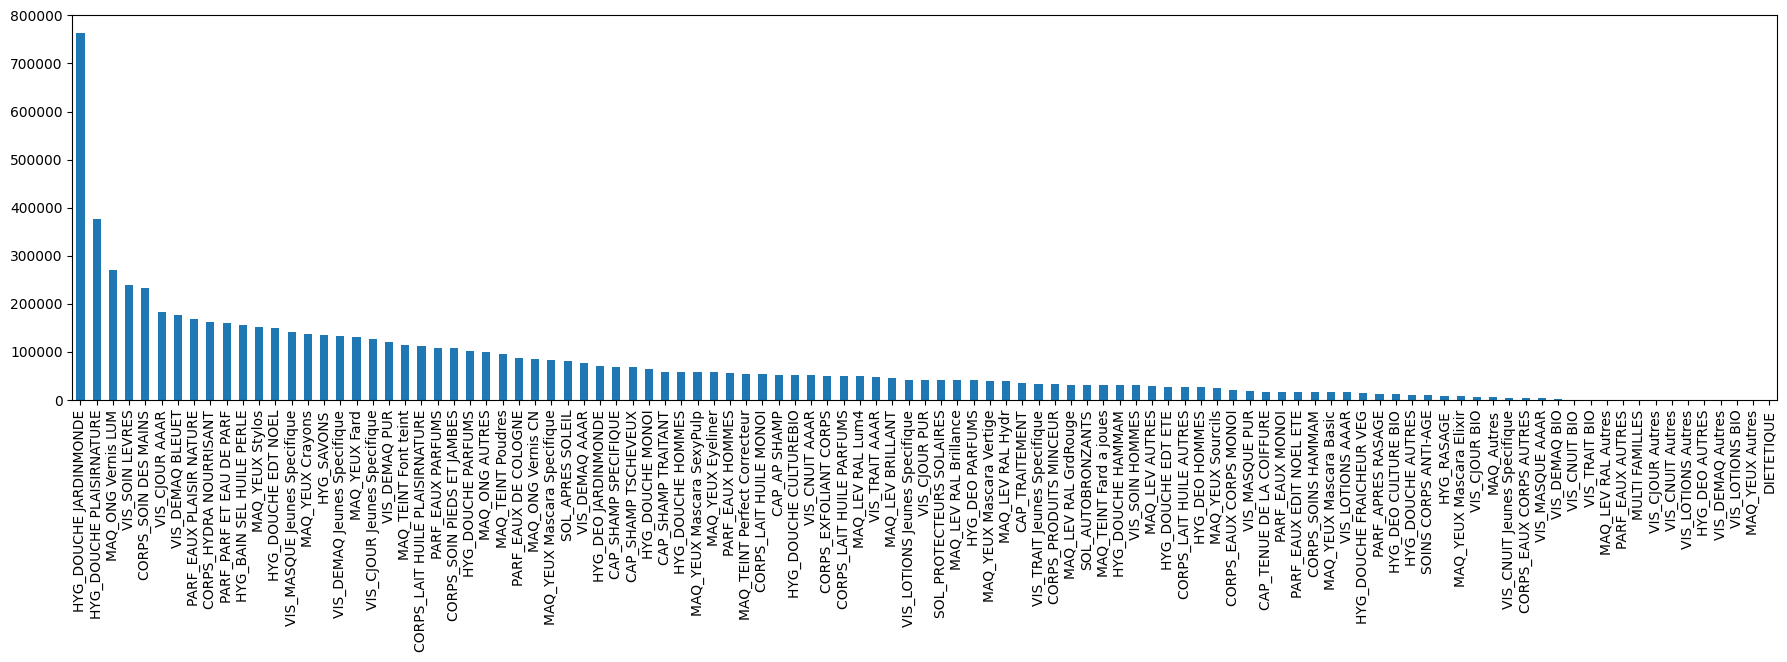

In [124]:
plt.subplots(figsize=(22,5))
itemByUnivers.plot.bar()

In [126]:
itemByFamille

HYGIENE            2095077
MAQUILLAGE         1694751
SOINS DU VISAGE    1494034
SOINS DU CORPS      878923
PARFUMAGE           628087
CAPILLAIRES         301365
SOLAIRES            153254
MULTI FAMILLES          30
SANTE NATURELLE          1
Name: FAMILLE, dtype: int64

<AxesSubplot: >

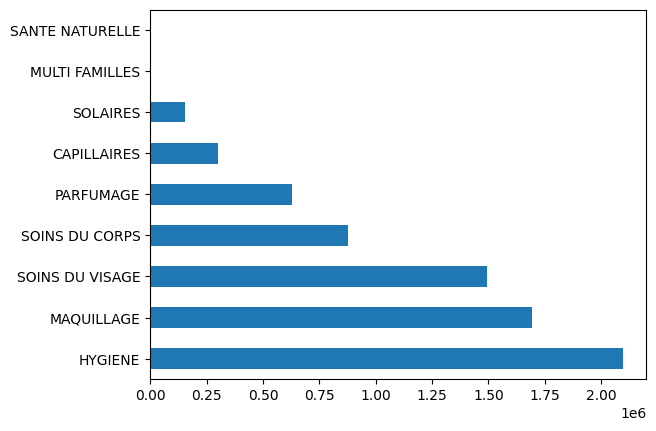

In [92]:
itemByFamille.plot.barh()

In [127]:
itemByMaille

HYG_JDM                        832615
VIS_JEUNE_ET_LEVRE             719808
HYG_PLAISIRNAT_BAIN_SAVON      666333
CORPS_HYDRA_NOURRI_ET_SOINS    513178
MAQ_ONGLES                     455670
PARF_PARFUM                    357662
MAQ_YEUX_CLASSIQUE             328863
MAQ_YEUX_MASCA_EYEL_FARD       328461
MAQ_TEINT                      294300
VIS_AAAR_HORS_DEMAQLOTION      285627
HYG_MONOI_ET_EDIT_SPEC         241394
PARF_EDT                       201601
CAPILLAIRE_SHAMPOING           197236
CORPS_HYDR_LAIT_HUILE          193406
VIS_PUR                        179657
VIS_AUTRES                     175988
SOLAIRE                        153254
HYG_PARFUMEE                   142221
MAQ_LEV_RAL_HMG                139140
CAPILLAIRE_AUTRE               104129
CORPS_SPA_ET_MINCEUR            98760
MAQ_LEV_BASPRIX                 93880
HYG_HOMME                       93210
VIS_AAAR_DEMAQLOTION            93182
CORPS_MONOI                     73579
PARF_HOMME                      68824
HYG_CULTUREB

<AxesSubplot: >

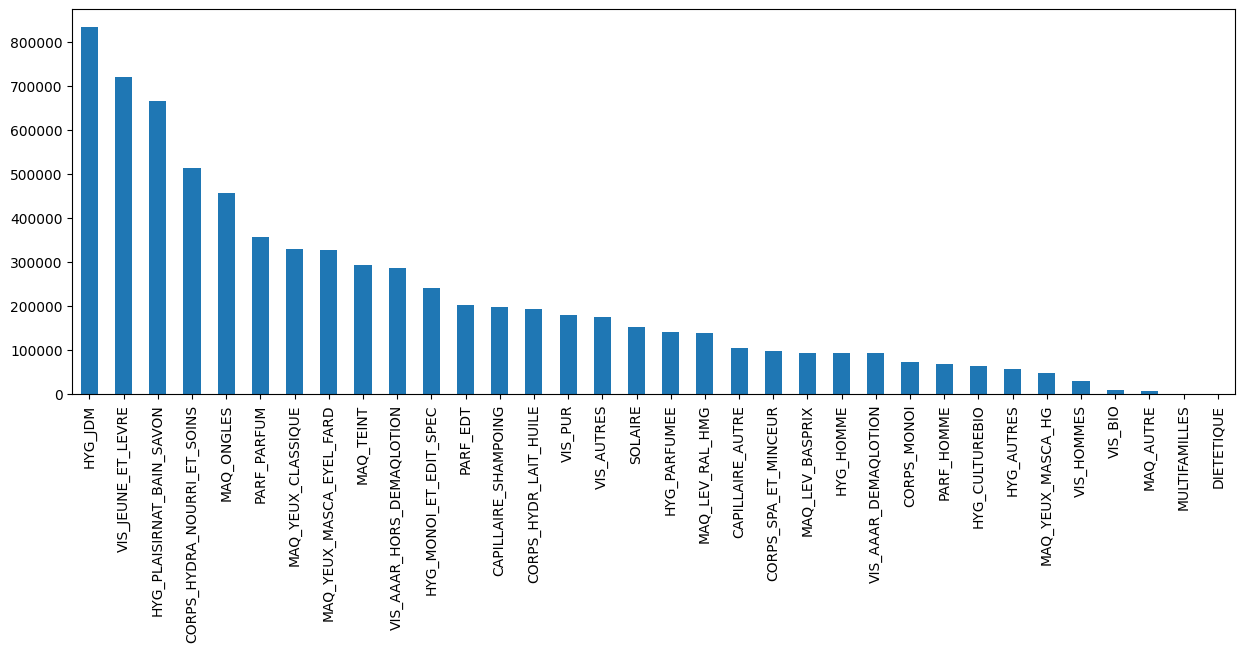

In [123]:
plt.subplots(figsize=(15,5))
itemByMaille.plot.bar()

In [107]:
itemsMaxByFamille = items.groupby('FAMILLE').agg('LIBELLE').max()
itemsMaxByFamille

FAMILLE
CAPILLAIRES             VINAIGRE DE RINCAGE FRAMBOISE 150ML
HYGIENE            VOILE D' AMBRE  BRUME DE PARFUM DEO100ML
MAQUILLAGE                x99SS GELEE FRUITS VANIL PN2 10ML
MULTI FAMILLES                             2010 KIT MAQ PDR
PARFUMAGE                   ROLL-ON  VANILLE NOIRE 10ML S.E
SANTE NATURELLE               SOIN COSM ORALE 3X10 CAPS RC2
SOINS DU CORPS               VOILE CORPS SENTEUR NATURE 200
SOINS DU VISAGE        ULTRA PURETE SEBOSPECIFIC TUBE 125ML
SOLAIRES                      ZERO TRACE SPRAY SPF 30 150ML
Name: LIBELLE, dtype: object

In [109]:
itemsMaxByUnivers = items.groupby('UNIVERS').agg('LIBELLE').max()
itemsMaxByUnivers

UNIVERS
CAP_AP SHAMP                        SVC REPARATION AP SH 150 ML
CAP_SHAMP SPECIFIQUE             SVC REFLETS SH REF DOR FL200ML
CAP_SHAMP TRAITANT                      SVC REPARATION SH 300ML
CAP_SHAMP TSCHEVEUX                         SVC VOLUME SH 300ML
CAP_TENUE DE LA COIFFURE            SVC VOLUME SPR VOL  FL200ML
                                             ...               
VIS_SOIN HOMMES                        TENSEUR Y ENERGIE T 15ML
VIS_SOIN LEVRES                BIO BAUME LEVRES REPARATEUR 10ML
VIS_TRAIT AAAR                   Soin Rehausseur Regard 14ml OL
VIS_TRAIT BIO                        BIO SERUM ENERGIE STG 30ML
VIS_TRAIT Jeunes Specifique     STOP CORRECTEUR MALIN 1.4G SEBO
Name: LIBELLE, Length: 105, dtype: object

In [113]:
itemsMaxByMaille = items.groupby('MAILLE').agg('LIBELLE').max()
itemsMaxByMaille

MAILLE
CAPILLAIRE_AUTRE                    VINAIGRE DE RINCAGE FRAMBOISE 150ML
CAPILLAIRE_SHAMPOING                                SVC VOLUME SH 300ML
CORPS_HYDRA_NOURRI_ET_SOINS                     SVC pieds gommage T50ml
CORPS_HYDR_LAIT_HUILE                    VOILE CORPS SENTEUR NATURE 200
CORPS_MONOI                              MONOI EAU HYDRA PARF FP 125 ML
CORPS_SPA_ET_MINCEUR                       VENTRE PLAT T150ml CAFE VERT
DIETETIQUE                                SOIN COSM ORALE 3X10 CAPS RC2
HYG_AUTRES                            RECH DCHE DOUCEUR HAMAMELIS 250ML
HYG_CULTUREBIO                                    BIO MIEL DOUCHE 200ML
HYG_HOMME                                 SH. DOUCHE NATURE HOMME 200ML
HYG_JDM                                          GD JDM4 TIARE FL 200ML
HYG_MONOI_ET_EDIT_SPEC               SHPG DCHE TIARE ANIM MONOI FL150ML
HYG_PARFUMEE                   VOILE D' AMBRE  BRUME DE PARFUM DEO100ML
HYG_PLAISIRNAT_BAIN_SAVON                SELS DE BAIN 15G

mean price by each categories

In [121]:
meanPriceFamille = priceCategorie.groupby('FAMILLE').agg('mean')
meanPriceFamille

C:\Users\vicen\AppData\Local\Temp\ipykernel_24976\2307735604.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPriceFamille = priceCategorie.groupby('FAMILLE').agg('mean')


,PRIX_NET
FAMILLE,
CAPILLAIRES,4.171020
HYGIENE,2.776689
MAQUILLAGE,6.622168
MULTI FAMILLES,4.533333
PARFUMAGE,13.476105
SANTE NATURELLE,14.950000
SOINS DU CORPS,5.498090
SOINS DU VISAGE,7.024985
SOLAIRES,7.613432


In [120]:
meanPriceUnivers = priceCategorie.groupby('UNIVERS').mean()
meanPriceUnivers

C:\Users\vicen\AppData\Local\Temp\ipykernel_24976\3949716305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPriceUnivers = priceCategorie.groupby('UNIVERS').mean()


,PRIX_NET
UNIVERS,
CAP_AP SHAMP,3.317250
CAP_SHAMP SPECIFIQUE,3.683006
CAP_SHAMP TRAITANT,3.873442
CAP_SHAMP TSCHEVEUX,3.554275
CAP_TENUE DE LA COIFFURE,6.038025
...,...
VIS_SOIN HOMMES,8.429172
VIS_SOIN LEVRES,1.781596
VIS_TRAIT AAAR,14.078674


In [119]:
meanPriceMaille = priceCategorie.groupby('MAILLE').agg('mean')
meanPriceMaille

C:\Users\vicen\AppData\Local\Temp\ipykernel_24976\2688931156.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanPriceMaille = priceCategorie.groupby('MAILLE').agg('mean')


,PRIX_NET
MAILLE,
CAPILLAIRE_AUTRE,5.072645
CAPILLAIRE_SHAMPOING,3.695015
CORPS_HYDRA_NOURRI_ET_SOINS,4.725954
CORPS_HYDR_LAIT_HUILE,4.631652
CORPS_MONOI,6.579346
CORPS_SPA_ET_MINCEUR,10.401485
DIETETIQUE,14.950000
HYG_AUTRES,4.599297
HYG_CULTUREBIO,2.598661


mean and std of item per client

In [187]:
itemClient = df.loc[:,['CLI_ID']]
itemClient.groupby('CLI_ID').value_counts().agg(['mean', 'std'])
# itemClient.groupby('CLI_ID').value_counts()
# itemClient.value_counts()

mean     8.489049
std     10.152110
dtype: float64

mean price by tickets

In [189]:
itemTicket = df.loc[:,['TICKET_ID', 'PRIX_NET']]
itemTicket.groupby('TICKET_ID').value_counts().agg('mean')

1.21618808483396

mean number of item per tickets

In [180]:
itemTicket.groupby('TICKET_ID')['PRIX_NET'].mean()

TICKET_ID
32931447    2.383333
32931448    9.833333
32931451    7.500000
32931452    3.800000
32931453    5.770000
              ...   
36529861    4.275000
36529862    2.950000
36529863    8.600000
36529864    4.500000
36529865    1.725000
Name: PRIX_NET, Length: 2734841, dtype: float64